# Proceso de clasificación de comentarios

En este notebook se implementará un modelo que nos permita analizar la toxicidad de un comentario, tomando como datos de entrenamiento un conjunto de comentarios de WikiPedia previamente clasificados. Lo primero que hacemos es realizar una lectura de los datos y una preparación de los comentarios eliminando caracteres especiales. No se realiza una tokenización porque debemos almacenar un contexto de la frase.

La clasificación de los comentarios contiene 6 variables importantes para clasificación con valores de 1 o 0 esto es importante para la forma en la cual crearemos la variable objetivo.

In [1]:
import pandas as pd
import numpy as np
import re, string

df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')

cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

def clean_text_round1(text):
    '''make text lowercase, remove punctuation.'''
    text = text.lower()
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('[\n]', ' ', text)
    text = re.sub('@\w+', '', text)
    text = re.sub('RT', '', text)
    return text

df_train.comment_text = df_train.comment_text.apply(lambda x: clean_text_round1(x))
df_test.comment_text = df_test.comment_text.apply(lambda x: clean_text_round1(x))
df_train.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0
1,000103f0d9cfb60f,daww he matches this background colour im seem...,0,0,0,0,0,0
2,000113f07ec002fd,hey man im really not trying to edit war its j...,0,0,0,0,0,0
3,0001b41b1c6bb37e,more i cant make any real suggestions on impr...,0,0,0,0,0,0
4,0001d958c54c6e35,you sir are my hero any chance you remember wh...,0,0,0,0,0,0
5,00025465d4725e87,congratulations from me as well use the tool...,0,0,0,0,0,0
6,0002bcb3da6cb337,cocksucker before you piss around on my work,1,1,1,0,1,0
7,00031b1e95af7921,your vandalism to the matt shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,sorry if the word nonsense was offensive to yo...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


una estrategia que podemos usar para crear una clase a la cual pertenece un conmentario es generar una codificación con números binarios, donde cada valor es una categoria dentro de la misma al tener 6 variables tendriamos en total $2^6 - 1$ posibilidades. que almacenaremos en la columna `number` y creamos `mapping_result_df` para realizar un cruce de los resultados con la clasificación original.

In [2]:
df_train['binary'] = df_train['toxic'].map(str)+df_train['severe_toxic'].map(str)+df_train['obscene'].map(str)+df_train['threat'].map(str)+df_train['insult'].map(str)+df_train['identity_hate'].map(str)

In [3]:
df_train['number'] = df_train['binary'].apply(lambda x: int(x,2))

In [4]:
sample_classification_df = df_train.drop_duplicates(subset=['number']).sort_values(by=['number'])
mapping_result_df = sample_classification_df.loc[:,sample_classification_df.columns[2:10]].reset_index()
sample_classification_df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,binary,number
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0,000000,0
3620,09b51ed1ee5e29a1,mate sound like you are jewish gayness is in ...,0,0,0,0,0,1,000001,1
179,006d11791d76b9f3,reply above that was me loser the un defines v...,0,0,0,0,1,0,000010,2
7036,12c82a67010c0fcf,an illness has nothing to do with timeera bu...,0,0,0,0,1,1,000011,3
3712,09eb7d87b8c24ca5,please stop if you continue to ignore our poli...,0,0,0,1,0,0,000100,4
23374,3dbae03a5f33e414,hey thank you for reediting my contributions i...,0,0,0,1,1,0,000110,6
527,01625cc84c6ef15b,how do you know he is dead its just his plane...,0,0,1,0,0,0,001000,8
74607,c797b58f2390ea5a,niggardly is a perennial favourite in that cat...,0,0,1,0,0,1,001001,9
1867,050c330758a40c44,reliable sources cheating barry bondscheater f...,0,0,1,0,1,0,001010,10
4468,0be7965b23078261,just face the truth you cant escape it userari...,0,0,1,0,1,1,001011,11


vemos la distribución de los comentarios de acuerdo a su nivel de toxicidad, recordando que según la clasificación binaria que le dimos 0 es para nada tóxico y 63 lo más tóxico posible.

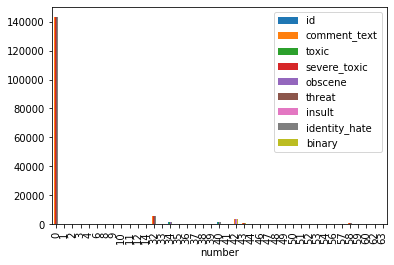

In [5]:
import matplotlib.pyplot as plt
df_train.groupby('number').count().plot.bar(ylim=0)
plt.show()

In [6]:
df_train.groupby('number').count().sort_values(by=['id'],ascending=[False]).head(20)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,binary
number,,,,,,,,,
0,143346,143346,143346,143346,143346,143346,143346,143346,143346
32,5666,5666,5666,5666,5666,5666,5666,5666,5666
42,3800,3800,3800,3800,3800,3800,3800,3800,3800
40,1758,1758,1758,1758,1758,1758,1758,1758,1758
34,1215,1215,1215,1215,1215,1215,1215,1215,1215
58,989,989,989,989,989,989,989,989,989
43,618,618,618,618,618,618,618,618,618
8,317,317,317,317,317,317,317,317,317
2,301,301,301,301,301,301,301,301,301


Con esta tabla finalizamos la fase de preparación de datos. Se presenta una tabla que permite ver de manera resumida algunas de los conceptos es esta fase de preparación de datos

|numero   	|binario   	|significado|
|---	|---	|---	|
|0   	|000000   	|No toxico   	|
|32   	|100000   	|tóxico   	|
|33   	|100001   	|tóxico, identity_hate  	|
|63   	|111111   	|tóxico,severe_toxic,obscene,threat,insult,identity_hate  	|

## Naive Bayes para análisis de texto
Recordando de la sección de preparación de datos tenemos dos dataframes `df_train` y `df_test` con estos dataframes se procede a entrenar un modelo lo primero que hacemos es vectorizar toda la información del vocabulario, y pasarle esta información al modelo, Multinomial de Naive Bayes esto lo observamos en esta sección

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(df_train['comment_text'], df_train['number'].map(str))
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(df_train['comment_text'])

In [8]:
X_train_tfidf = TfidfTransformer().fit_transform(X_train_counts)


In [9]:
clf = MultinomialNB().fit(X_train_tfidf,df_train['number'].map(str))
clf

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### Probando la efectividad del modelo
Con el modelo construido podemos evaluar algunos comentarios en inglés que permitan la eficiencia del modelo en los ejemplos se toman comentarios inventados y tomamos tambien comentarios de los que obtuvimos en test para evaluar la calidad del modelo 

In [10]:
print(clf.predict(count_vect.transform(["This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."])))

['0']


In [11]:
print(clf.predict(count_vect.transform(["motherfucker nigga gay"])))

['42']


precisión general del modelo

In [12]:
"La puntuación general del algoritmo es: {:0.4f} %".format(float(clf.score(count_vect.transform(X_test), y_test) * 100))

'90.2539%'

Podemos mirar mas en detalle la calidad de los resultados con una matriz de confusión o con el reporte de clasificación recordemos que tenemos alrededor de 63 clases por este motivo la matriz es algo extensa

In [13]:
confusion_matrix(y_test, clf.predict(count_vect.transform(X_test)))

array([[35909,     0,     0, ...,     0,     0,     0],
       [   20,     0,     0, ...,     0,     0,     0],
       [   46,     0,     0, ...,     0,     0,     0],
       ...,
       [   13,     0,     0, ...,     0,     0,     0],
       [    8,     0,     0, ...,     0,     0,     0],
       [   59,     0,     0, ...,     0,     0,     0]], dtype=int64)

In [14]:
print(classification_report(y_test, clf.predict(count_vect.transform(X_test)), labels=np.unique(np.array(clf.predict(count_vect.transform(X_test))))))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     35928
          32       0.32      0.01      0.02      1385
          40       0.86      0.01      0.03       443
          42       0.42      0.08      0.13       918
          43       0.40      0.01      0.03       135
          56       1.00      0.05      0.10        39
          58       1.00      0.02      0.03       252
          59       0.00      0.00      0.00        59

   micro avg       0.90      0.92      0.91     39159
   macro avg       0.61      0.15      0.16     39159
weighted avg       0.87      0.92      0.88     39159



## Exportar modelo y vectorización de texto
Utilizacmos la librería pickle para realizar exportar los resultados del modelo y poder utilizarlos en secciones posteriores

In [15]:
import pickle
pickle.dump( clf, open( "multinomial_model.pkl", "wb" ) )
pickle.dump( count_vect, open("vectorizer_text.pkl", "wb"))

## Leer modelo y vectorización de texto (opcional)
Utilizacmos la librería pickle para realizar exportar los resultados del modelo y poder utilizarlos en secciones posteriores

In [16]:
clf = pickle.load( open( "multinomial_model.pkl", "rb" ) )
count_vect =pickle.load(open("vectorizer_text.pkl", "rb"))

## Clasificando nuevos valores 

Para realizar una prueba realizamos la predicción sobre la base de datos para clasificar Twitter y mostramos los resultados en una tabla y verificamos que los resultados obtenidos si correspondan a lo esperado

In [18]:
df_test['predicted'] = clf.predict(count_vect.transform(df_test['comment_text'])).astype(int)
df_test_merged = df_test.merge(mapping_result_df, how='left', left_on='predicted', right_on='number')
df_test_merged.head(20)


,id,comment_text,predicted,index,toxic,severe_toxic,obscene,threat,insult,identity_hate,binary,number
0,00001cee341fdb12,yo bitch ja rule is more succesful then youll ...,0,0,0,0,0,0,0,0,000000,0
1,0000247867823ef7,from rfc the title is fine as it is imo,0,0,0,0,0,0,0,0,000000,0
2,00013b17ad220c46,sources zawe ashton on lapland —,0,0,0,0,0,0,0,0,000000,0
3,00017563c3f7919a,if you have a look back at the source the info...,0,0,0,0,0,0,0,0,000000,0
4,00017695ad8997eb,i dont anonymously edit articles at all,0,0,0,0,0,0,0,0,000000,0
5,0001ea8717f6de06,thank you for understanding i think very highl...,0,0,0,0,0,0,0,0,000000,0
6,00024115d4cbde0f,please do not add nonsense to wikipedia such e...,0,0,0,0,0,0,0,0,000000,0
7,000247e83dcc1211,dear god this site is horrible,0,0,0,0,0,0,0,0,000000,0
8,00025358d4737918,only a fool can believe in such numbers t...,0,0,0,0,0,0,0,0,000000,0
9,00026d1092fe71cc,double redirects when fixing double redir...,0,0,0,0,0,0,0,0,000000,0


In [19]:
df_test_merged.loc[df_test_merged['id'] == '0002eadc3b301559', 'comment_text'].values[0]

'i think its crap that the link to roggenbier is to this article somebody that knows how to do things should change it'

### Revisando algunos resultados de la clasificación
Podemos tomar alguna clases en específico y analizamos su contenido para ver si fueron correctamente clasificadas, recordando esta tabla:

|numero   	|binario   	|significado|
|---	|---	|---	|
|32   	|100000   	|tóxico   	|
|34   	|100010   	|tóxico, insult  	|
|40   	|101000   	|tóxico,obscene  	|
|42   	|101010   	|tóxico,obscene, insult  	|



In [20]:
df_test_merged.loc[df_test_merged['number'] == 32, 'comment_text'].values[1]

'gay fag fag fag'

In [21]:
df_test_merged.loc[df_test_merged['number'] == 34, 'comment_text'].values[2]

' faggot     niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerjew niggerj

In [22]:
df_test_merged.loc[df_test_merged['number'] == 40, 'comment_text'].values[0]

'penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis pen

In [23]:
df_test_merged.loc[df_test_merged['number'] == 42, 'comment_text'].values[0]

'fuck off you antisemitic cunt  '

Con este resultado podemos concluir que para los datos de prueba podemos utilizar este modelo para clasificar comentarios de Twitter